**AUTOENCODERS INTRODUCTION**

Author: Felipe Verdes Wolukanis

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [2]:
# Import libraries
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

1) Load MNIST digit dataset

In [0]:
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

2) Visualize the data

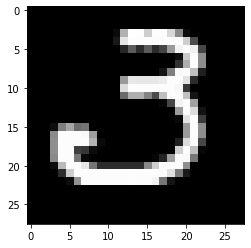

In [4]:
# Random data visualizer

i = random.randint(1, x_train.shape[0])

plt.imshow(x_train[i], cmap = 'gray')

3) Normalize the data

In [0]:
x_train = x_train / 255
x_test = x_test / 255

4) Noise addition

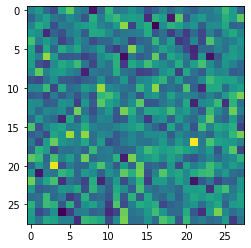

In [6]:
added_noise = np.random.randn(*(28,28))

plt.imshow(added_noise)

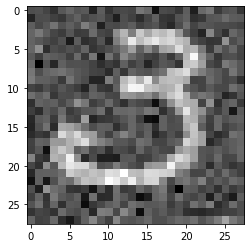

In [7]:
noise_factor = 0.2
sample_image = x_train[i]
noisy_image = sample_image + noise_factor * np.random.randn(*(28,28))
plt.imshow(noisy_image, cmap = "gray")

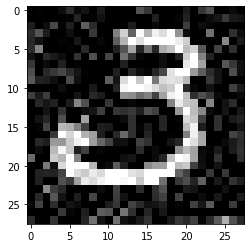

In [8]:
noisy_image = np.clip(noisy_image, 0, 1.0)
plt.imshow(noisy_image, cmap = 'gray')

In [0]:
# Realworld does not have uniform random noise
x_train_noisy = []
for image in x_train:
  noise_factor = random.uniform(0.10, 0.45)
  image_noisy = image + noise_factor * np.random.randn(*(28, 28))
  image_noisy = np.clip(image_noisy, 0, 1.0)
  x_train_noisy.append(image_noisy)

x_train_noisy = np.array(x_train_noisy)

In [0]:
x_test_noisy = []
for image in x_test:
  noise_factor = random.uniform(0.10, 0.35)
  image_noisy = image + noise_factor * np.random.randn(*(28, 28))
  image_noisy = np.clip(image_noisy, 0, 1.0)
  x_test_noisy.append(image_noisy)

x_test_noisy = np.array(x_test_noisy)

5) Autoencoder architecture

In [11]:
from tensorflow import keras


conv_encoder = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size = 3, padding = 'same', activation = 'selu',
                        input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = 2),

    keras.layers.Conv2D(32, kernel_size = 3, padding = 'same', activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = 2),

    keras.layers.Conv2D(64, kernel_size = 3, padding = 'same', activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = 2)

])

                             


conv_decoder = keras.models.Sequential([                                    
    keras.layers.Conv2DTranspose(32, kernel_size = 3, strides = 2, 
                                 padding = 'valid', activation = 'selu',
                                 input_shape = [3, 3, 64]),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2DTranspose(16, kernel_size = 3, strides = 2, 
                                 padding = 'same', activation = 'selu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2DTranspose(1, kernel_size = 3, strides = 2, 
                                 padding = 'same', activation = 'sigmoid')

                     
])

conv_auto = keras.models.Sequential([conv_encoder, conv_decoder])

conv_encoder.summary()
conv_decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [12]:
conv_auto.compile(loss = 'binary_crossentropy', 
                    optimizer = keras.optimizers.Nadam(learning_rate = 0.001))

conv_auto.fit(x_train_noisy.reshape(len(x_train), 28, 28, 1),
              x_train.reshape(len(x_train), 28, 28, 1),
              epochs = 10,
              batch_size = 50)

Epoch 1/10
60000/60000 [==============================] - 22s 359us/sample - loss: 0.1513
Epoch 2/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0883
Epoch 3/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0849
Epoch 4/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0833
Epoch 5/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0823
Epoch 6/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0816
Epoch 7/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0811
Epoch 8/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0808
Epoch 9/10
60000/60000 [==============================] - 20s 325us/sample - loss: 0.0804
Epoch 10/10
60000/60000 [==============================] - 20s 325us/sample - loss: 0.0802


5) Result evaluation

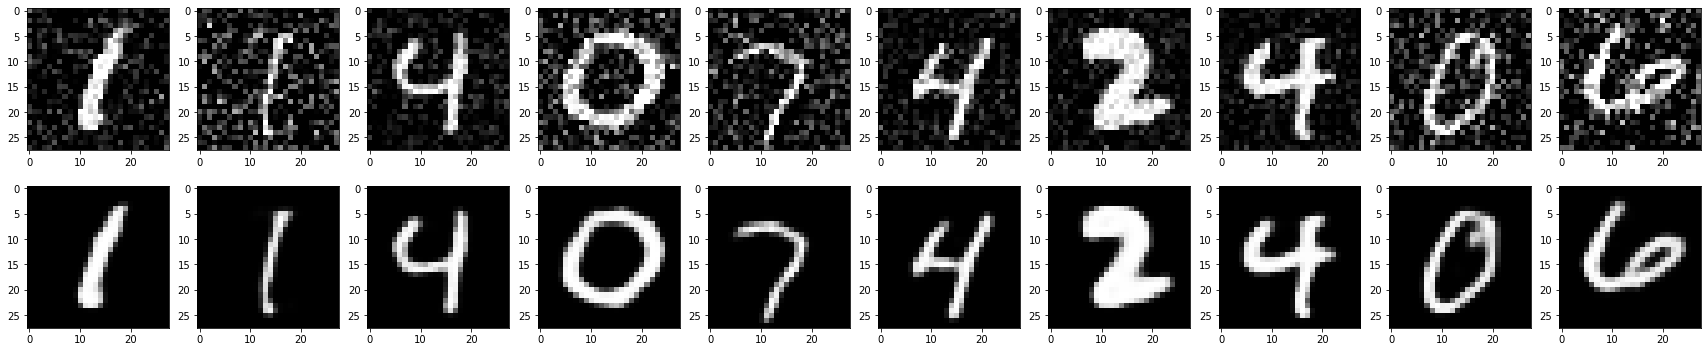

In [13]:
num = random.randint(0, len(x_test))
denoised_images = conv_auto.predict(x_test_noisy[num:num + 10].reshape(10, 28, 28, 1))



fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(30,6))
for images, row in zip([x_test_noisy[num:num + 10], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'gray')